In [1]:
# Mount google drive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
# Import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
# Read data
data = pd.read_csv('/content/gdrive/MyDrive/Classroom/Data Science Bootcamp Batch 6/DAY 17 EDA Python/admission_data.csv')

## 1. Missing Value Check and Handling

In [5]:
# Print 5 data samples
data.sample(5)

,gre_score,toefl_score,univ_ranking,motiv_letter_strength,recommendation_strength,gpa,research_exp,admit_status
192,322.0,NaN,5.0,4.5,4.0,8.94,yes,1
237,329.0,114.0,5.0,4.5,5.0,9.19,yes,1
33,340.0,114.0,5.0,4.0,4.0,9.60,yes,1
480,321.0,102.0,3.0,3.5,4.0,9.01,yes,1
404,311.0,101.0,3.0,2.0,2.5,7.64,yes,0


In [6]:
# Simple data checking
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505 entries, 0 to 504
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   gre_score                496 non-null    float64
 1   toefl_score              497 non-null    float64
 2   univ_ranking             498 non-null    float64
 3   motiv_letter_strength    503 non-null    float64
 4   recommendation_strength  499 non-null    float64
 5   gpa                      501 non-null    float64
 6   research_exp             505 non-null    object 
 7   admit_status             505 non-null    int64  
dtypes: float64(6), int64(1), object(1)
memory usage: 31.7+ KB


In the data, there are 8 columns and 505 rows.

All columns except 'research_exp' and 'admit_status' have missing values.

In [7]:
# number of missing values per column
data.isna().sum()

gre_score                  9
toefl_score                8
univ_ranking               7
motiv_letter_strength      2
recommendation_strength    6
gpa                        4
research_exp               0
admit_status               0
dtype: int64

In [8]:
# drop missing values
data = data.dropna()

In [9]:
# check missing values
data.isna().sum()

gre_score                  0
toefl_score                0
univ_ranking               0
motiv_letter_strength      0
recommendation_strength    0
gpa                        0
research_exp               0
admit_status               0
dtype: int64

Done! There's no more missing values :D

## 2. Duplicated Value Check and Handling

In [10]:
# number of duplicated data
data.duplicated().sum()

5

There are 5 duplicated rows, will be dropped later.

In [11]:
# sample duplicated rows
data[data.duplicated(keep=False)].sort_values('gre_score').head(5)

,gre_score,toefl_score,univ_ranking,motiv_letter_strength,recommendation_strength,gpa,research_exp,admit_status
364,313.0,102.0,3.0,3.5,4.0,8.90,yes,1
500,313.0,102.0,3.0,3.5,4.0,8.90,yes,1
74,314.0,106.0,3.0,3.0,5.0,8.90,no,1
504,314.0,106.0,3.0,3.0,5.0,8.90,no,1
111,321.0,109.0,4.0,4.0,4.0,8.68,yes,0


### Drop duplicated rows

In [12]:
# drop duplicated rows
data = data.drop_duplicates()

In [13]:
# check
data.duplicated().sum()

0

Done!

## 3. Statistical Summaries of Columns

In [15]:
# Grouping columns by data category
categoricals = ['research_exp']
numericals = ['gre_score', 'toefl_score', 'univ_ranking', 'motiv_letter_strength', 'recommendation_strength', 'admit_status']

In [16]:
# numerical statistical summary
data[numericals].describe()

,gre_score,toefl_score,univ_ranking,motiv_letter_strength,recommendation_strength,admit_status
count,464.000000,464.000000,464.000000,464.000000,464.000000,464.000000
mean,316.327586,107.090517,3.118534,3.366379,3.476293,0.571121
std,11.242104,5.934888,1.119704,0.968974,0.919244,0.495450
min,290.000000,92.000000,1.000000,1.000000,1.000000,0.000000
25%,308.000000,103.000000,2.000000,2.500000,3.000000,0.000000
50%,316.000000,107.000000,3.000000,3.500000,3.500000,1.000000
75%,324.000000,111.250000,4.000000,4.000000,4.000000,1.000000
max,340.000000,120.000000,5.000000,5.000000,5.000000,1.000000


Findings:

1. 'admit_status' column is a boolean/binary column with values 0 and 1.

2. Overall, there is nothing unusual about the minimum and maximum values for each column.

3. Mean ~ 50% (Median) for all columns except 'admit_status', indicating a symmetrical distribution.

4. Mean < 50% (Median) in column 'admit_status' indicates a negatively skewed distribution

In [17]:
# describe method on categorical data
data[categoricals].describe()

,research_exp
count,464
unique,2
top,yes
freq,252


Findings:

Most of them have research experience.

## 4. Univariate Analysis

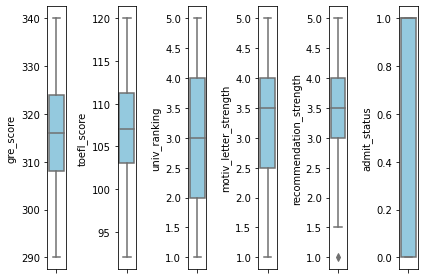

In [18]:
# Boxplot to detect outliers
features = numericals
for i in range(0, len(features)):
    plt.subplot(1, len(features), i+1)
    sns.boxplot(y=data[features[i]], color='skyblue')
    plt.tight_layout()

Findings:

There is an outlier in the 'recommendation_strength' column.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

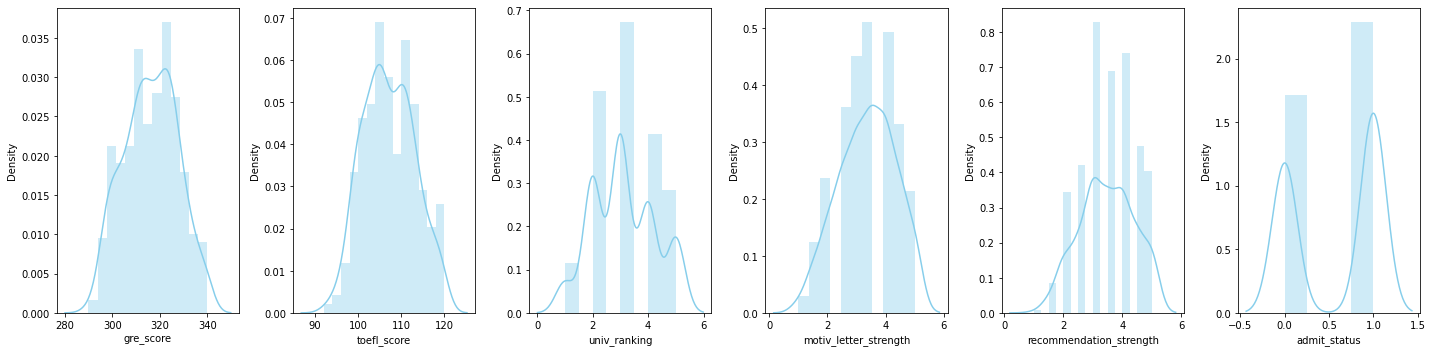

In [19]:
features = numericals
plt.figure(figsize=(20,5))
for i in range(0, len(features)):
    #plt.subplot(2, len(features)//2, i+1)
    plt.subplot(1, len(features), i+1)
    sns.distplot(x=data[features[i]], color='skyblue')
    plt.xlabel(features[i])
    plt.tight_layout()

Findings:

1. The 'admit_status' column is a binary column.

2. 'gre_score','toefl_score','univ_ranking','motiv_letter_strength','recommendation_strength' column has symmetrical distribution.

## 5. Bivariate Analysis

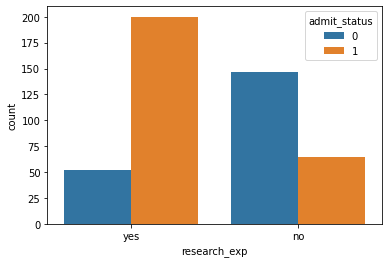

In [20]:
# research_exp vs admit_status 
sns.countplot(data=data,
            x='research_exp',
            hue='admit_status')

Findings:

Between people who have and do not have research experience, there is a difference in the probability of being accepted. The chance of someone who has research exp is greater to be accepted compared to one who does not have research experience.

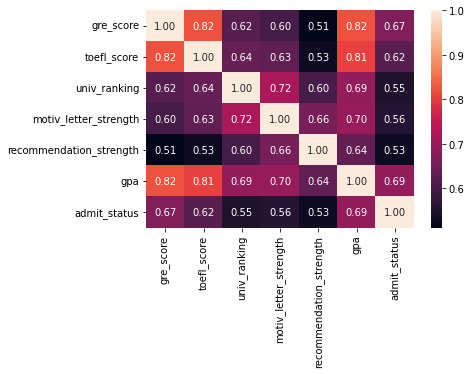

In [22]:
# Correlation using heatmap
correlation = data.corr()
sns.heatmap(correlation, annot=True, fmt='.2f')

Findings:

There is highly correlated between:

gre_score & toefl_score, toefl_score & gpa, gre_score & gpa

## 6. Overall Summary

1. The data does not contain major issues. There are only some NULL values and duplicated rows. I've handled them accordingly.

2. Overall, the minimum and maximum values make sense for each column.

3. Most of the columns have symmetrical distribution, except for 'admit_status'. 

4. There is an outlier in 'recommendation_strength' column.

5. From barcharts of categorical column vs admit_status, I found that the chance of someone who has research exp is greater to be accepted compared to one who does not have research experience.

6. From correlation heatmap, there is highly correlated between gre_score & toefl_score, toefl_score & gpa, gre_score & gpa.